In [ ]:
# Sumani
# 20-7-2024

# 1. Introduction to Tensors

To start, we import the PyTorch library. Note that the package name is torch.


A tensor represents a (possibly multidimensional) array of numerical values. 
1. In the zero dimensional case, a tensor is called a scalar. 
2. In the one dimensional case, i.e., when only one axis is needed for the data, a tensor is called a vector.
3. With two axes, a tensor is called a matrix.
4. With 𝑘 > 2 axes, we drop the specialized names and just refer to the object as a 𝑘 th order tensor.

In [ ]:
import torch
import torch.autograd
import torch.nn
torch.__version__

### Scalars
Scalars: Scalars are single numerical values. They have magnitude but no direction. Examples include temperature, mass, and time.


In [ ]:
scalar = torch.tensor(7)
scalar

In [ ]:
scalar.item()

## Vectors
Vectors: Vectors are quantities with both magnitude and direction. They are represented by arrows. Examples include velocity, force, and displacement.

In [ ]:
vector = torch.tensor([7, 3, 7])
vector

In [ ]:
vector.shape

## Matrix
Matrices: Matrices are 2-D arrays of numbers. They are used to represent data or transformations. A matrix has rows and columns. For example:

[[7, 8], [9, 6]]

In [ ]:
# Matrix
MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])
MATRIX

In [ ]:
MATRIX.shape

### Tensors

Tensors generalize scalars, vectors, and matrices to higher dimensions. They are used in deep learning and represent multi-dimensional data.

In [ ]:
# Tensor
TENSOR = torch.tensor([[[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]]])
TENSOR

In [ ]:
TENSOR.ndim

# 2. Creating Tensors

## Random_tensor, Ones, and Zeros

https://learn.microsoft.com/en-us/training/modules/intro-machine-learning-pytorch/2-tensors

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))

random_tensor, random_tensor.dtype

In [ ]:
shape = (4,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

# arange

By invoking arange(n), we can create a vector of evenly spaced values, starting at 0 (included) and ending at n (not included).
By default, the interval size is 1. Unless otherwise specified, new tensors are stored in main memory and designated for CPU-based
computation.

In [ ]:
x = torch.arange(12, dtype=torch.float32)
x

Each of these values is called an element of the tensor. The tensor x contains 12 elements.

In [ ]:
# Exercise
# Create a tonsor of (3, 6, 4)
# Print 3rd element in the first column of the second matrix.

# 3. Attributes of Tensors

In [ ]:
tensor = torch.rand(3,4)

In [ ]:
# We can inspect the total number of elements in a tensor via its numel method
print(f"total number of elements: {tensor.numel()}")

In [ ]:
# We can access a tensor’sshape (the length along each axis) by inspecting its shape attribute
print(f"Shape of tensor: {tensor.shape}")

In [ ]:
# Print data type of tensor
print(f"Datatype of tensor: {tensor.dtype}")

In [ ]:
# Exercise - Print the device tensor is stored on


# 4. Operations on tensors

## 4.1 Indexing and slicing

We can access tensor elements by indexing (starting with 0). To access an element based on its position relative to the end of the list, we can use negative indexing.

We can access whole ranges of indices via slicing (e.g., X[start:stop]), where the returned value includes the first index (start) but not the last (stop). 

Finally, when only one index (or slice) is specified for a 𝑘 th-order tensor, it is applied along axis 0. Thus, in the following code, [-1] selects the last row and [1:3] selects the second and third rows.

In [ ]:
tensor = torch.tensor([[2,4,6,8],[1,3,5,9],[3,5,7,9]])
tensor


In [ ]:
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])

In [ ]:
# Exercise - print last row and last column.

In [ ]:
# Update the tensor
tensor[2,3] = 23
tensor

In [ ]:
# Update the tensor
tensor[:,1] = 10
print(tensor)

In [ ]:
# If we want to assign multiple elements the same value, we apply the indexing on the lefthand side of the assignment operation.
# For instance, [:2, :] accesses the first and second rows, where : takes all the elements along axis 1 (column).
tensor[:2,:] = 18
print(tensor)

## 4.2 Arithmatic operations

The common standard arithmetic operators for addition (+), subtraction (-), multiplication (*), division (/), and exponentiation (**) have all been lifted to elementwise operations for identically-shaped tensors of arbitrary shape.

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])


In [ ]:
x + y, x - y, x * y, x / y, x ** y

## 4.3 Matrix Multiplication and Dot Product

In addition to elementwise computations, we can also perform linear algebraic operations, such as dot products and matrix multiplications.

In [ ]:
# Dot Product
print (tensor*tensor)
print (tensor.mul(tensor))

# Matrix Multiplication
print (tensor.matmul(tensor.T))

## 4.4 Joining tensors (concatination)

You can use torch.cat to concatenate a sequence of tensors along a given dimension. torch.stack is a related tensor joining option that concatenates a sequence of tensors along a new dimension.

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

t1 = torch.cat((X, Y), dim=0)
print (t1)

t2 = torch.cat((X, Y), dim=1)
print (t2)

## 4.5 Logical Operation
Sometimes, we want to construct a binary tensor via logical statements. Take X == Y as an
example. For each position i, j, if X[i, j] and Y[i, j] are equal, then the corresponding
entry in the result takes value 1, otherwise it takes value 0

In [ ]:
X == Y

In [ ]:
# Exercise - Consider a tensor of shape (2, 3, 4). What are the shapes of the summation outputs along axes 0, 1, and 2?

## 4.6 Inplace Operations

In [ ]:
print(tensor, "\n")
print(tensor.add(5), "\n")
print(tensor, "\n")

tensor.add_(5)
print(tensor)

# 5. Auto Grad

Computing Gradient

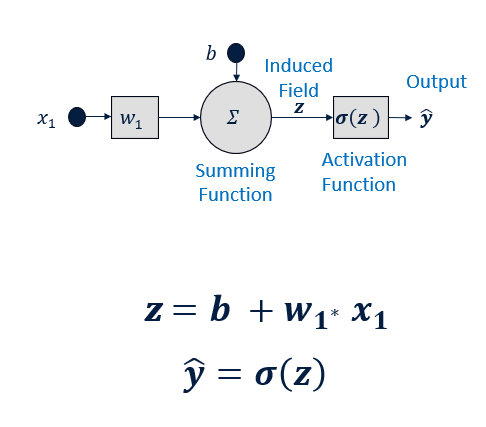

In [ ]:
# Forward pass
b = torch.tensor(0.1)
w_1 = torch.tensor(0.3, requires_grad=True)
x_1 = torch.tensor(0.2)

u = w_1*x_1
z = u + b
y_hat = torch.sigmoid(z)
y_hat

In [ ]:
# Backward pass
from torch.autograd import grad
grad(y_hat, w_1)